In [4]:


# Load imports

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
filename = '/home/ece/Music/bike1/harley481.wav'
plt.figure(figsize=(12,4))
from scipy.io import wavfile as wav

ipd.Audio(filename)



<Figure size 864x288 with 0 Axes>

Original sample rate: 44100
Librosa sample rate: 22050
Original audio file min~max range: -31682 to 32767
Librosa audio file min~max range: -0.76733464 to 0.76722324


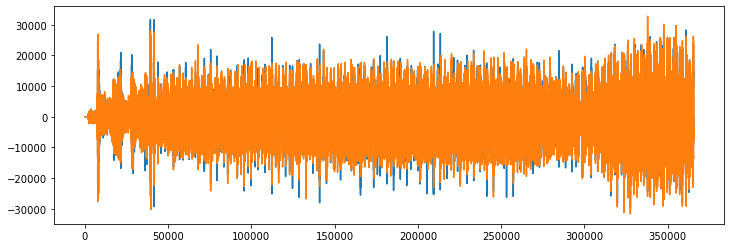

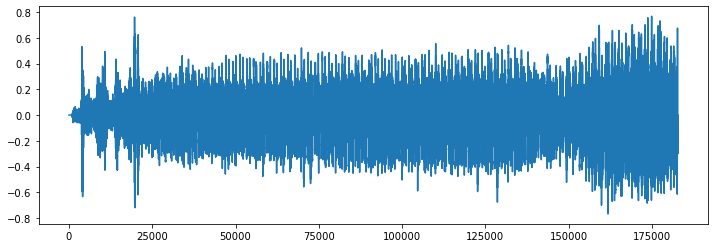

In [5]:
""### CHECKING SAMPLE RATE"""

from scipy.io import wavfile as wav
scipy_sample_rate, scipy_audio = wav.read(filename)

from scipy.io import wavfile as wav
import numpy as np

librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate)

"""### BIT DEPTH"""

print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

"""### CHECKING AUDIO CHANNEL"""

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

# Librosa audio with channels merged 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

(40, 357)


,"file_name,class_name"
0,"2008 Kawasaki Ninja 250r.wav,KAWASAKI"
1,"Harley.wav,HARLEY"
2,"Harley-Davidson .wav,HARLEY"
3,"KTM Duke.wav,KTM"
4,"KTMRC125o.wav,KTM"
...,...
229,"KTM16.wav,KTM"
230,"KTM17.wav,KTM"
231,"KTM18.wav,KTM"
232,"KTM19.wav,KTM"


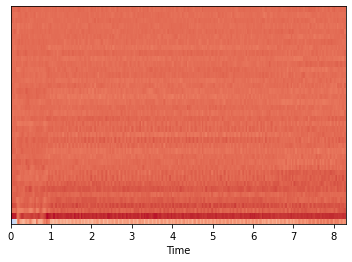

In [19]:

mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

import pandas as pd
filepath_or_buffer = '/home/ece/Videos/bike sp hj.csv'
pd.read_fwf(filepath_or_buffer, colspecs='infer', widths=None, infer_nrows=100)


In [8]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled


In [20]:
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = '/home/ece/Videos/bike sp'

metadata = pd.read_csv('/home/ece/Videos/bike sp hj.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["file_name"]))
    class_label = row["class_name"]
    
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 
print(featuresdf)

featuresdf.to_csv('dfdata.csv')

print(metadata.class_name.value_counts())

Finished feature extraction from  234  files
                                               feature class_label
0    [-95.34758, 131.61076, -80.91215, 95.421646, -...    KAWASAKI
1    [-44.43844, 75.582085, -28.329184, 23.416933, ...      HARLEY
2    [-8.866261, 49.40681, 21.061068, 28.81571, 6.4...      HARLEY
3    [32.28357, 65.85346, -18.080599, 18.747538, -1...         KTM
4    [-144.04903, 93.13892, -16.7343, 41.496807, -1...         KTM
..                                                 ...         ...
229  [-227.46637, 116.28378, -11.652334, 43.611366,...         KTM
230  [-146.03716, 92.09145, -12.007631, 40.169983, ...         KTM
231  [-113.60618, 88.692184, -10.085182, 40.715332,...         KTM
232  [-150.85689, 89.39332, -12.109208, 40.25608, -...         KTM
233  [-205.87419, 121.9227, -10.783024, 42.32616, -...         KTM

[234 rows x 2 columns]
HARLEY      40
ENFIELD     40
APACHE      40
KAWASAKI    40
PULSAR      40
KTM         34
Name: class_name, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

"""### SPLIT THE DATASET

Here we will use `sklearn.model_selection.train_test_split` to split the dataset into training and testing sets. 
"""

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.15, random_state = 42)


In [11]:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 3

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               10496     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

In [12]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/home/ece/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/200
5/5 [==============================] - 1s 71ms/step - loss: 39.1929 - accuracy: 0.0333 - val_loss: 9.4668 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 9.46680, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 28.1655 - accuracy: 0.0800 - val_loss: 7.6917 - val_accuracy: 0.0370

Epoch 00002: val_loss improved from 9.46680 to 7.69174, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 3/200
5/5 [==============================] - 0s 18ms/step - loss: 22.2897 - accuracy: 0.0733 - val_loss: 5.4677 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss improved from 7.69174 to 5.46772, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 4/200
5/5 [==============================] - 0s 19ms/step - loss: 18.4632 - accuracy: 0.0533 - val_loss: 4.3677 - val_accuracy: 0.0741

Epoch 00004: val_loss improved from 5.46772 to 4.36773, saving model to /home/ece/weights.best.bas


Epoch 00035: val_loss improved from 2.39421 to 2.38449, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 36/200
5/5 [==============================] - 0s 13ms/step - loss: 2.9613 - accuracy: 0.2200 - val_loss: 2.3941 - val_accuracy: 0.3333

Epoch 00036: val_loss did not improve from 2.38449
Epoch 37/200
5/5 [==============================] - 0s 13ms/step - loss: 2.9540 - accuracy: 0.2000 - val_loss: 2.3949 - val_accuracy: 0.3333

Epoch 00037: val_loss did not improve from 2.38449
Epoch 38/200
5/5 [==============================] - 0s 13ms/step - loss: 2.7038 - accuracy: 0.2533 - val_loss: 2.3877 - val_accuracy: 0.2593

Epoch 00038: val_loss did not improve from 2.38449
Epoch 39/200
5/5 [==============================] - 0s 15ms/step - loss: 2.6269 - accuracy: 0.2333 - val_loss: 2.3754 - val_accuracy: 0.2593

Epoch 00039: val_loss improved from 2.38449 to 2.37537, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 40/200
5/5 [==============================] - 0s 14m

5/5 [==============================] - 0s 13ms/step - loss: 2.0714 - accuracy: 0.3067 - val_loss: 2.0295 - val_accuracy: 0.3704

Epoch 00071: val_loss improved from 2.05337 to 2.02952, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 72/200
5/5 [==============================] - 0s 13ms/step - loss: 1.8551 - accuracy: 0.4000 - val_loss: 2.0201 - val_accuracy: 0.4444

Epoch 00072: val_loss improved from 2.02952 to 2.02008, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 73/200
5/5 [==============================] - 0s 12ms/step - loss: 1.9144 - accuracy: 0.3600 - val_loss: 2.0179 - val_accuracy: 0.4444

Epoch 00073: val_loss improved from 2.02008 to 2.01785, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 74/200
5/5 [==============================] - 0s 13ms/step - loss: 1.9520 - accuracy: 0.3533 - val_loss: 2.0155 - val_accuracy: 0.4444

Epoch 00074: val_loss improved from 2.01785 to 2.01553, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch

Epoch 104/200
5/5 [==============================] - 0s 15ms/step - loss: 1.3582 - accuracy: 0.5733 - val_loss: 1.6962 - val_accuracy: 0.4815

Epoch 00104: val_loss improved from 1.69881 to 1.69617, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 105/200
5/5 [==============================] - 0s 16ms/step - loss: 1.3153 - accuracy: 0.5800 - val_loss: 1.6848 - val_accuracy: 0.4815

Epoch 00105: val_loss improved from 1.69617 to 1.68479, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 106/200
5/5 [==============================] - 0s 17ms/step - loss: 1.2991 - accuracy: 0.5800 - val_loss: 1.6742 - val_accuracy: 0.4815

Epoch 00106: val_loss improved from 1.68479 to 1.67418, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 107/200
5/5 [==============================] - 0s 14ms/step - loss: 1.4357 - accuracy: 0.5800 - val_loss: 1.6815 - val_accuracy: 0.4815

Epoch 00107: val_loss did not improve from 1.67418
Epoch 108/200
5/5 [============================

5/5 [==============================] - 0s 20ms/step - loss: 0.8022 - accuracy: 0.7333 - val_loss: 1.5537 - val_accuracy: 0.4815

Epoch 00142: val_loss improved from 1.55460 to 1.55372, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 143/200
5/5 [==============================] - 0s 13ms/step - loss: 0.8970 - accuracy: 0.7400 - val_loss: 1.5573 - val_accuracy: 0.4815

Epoch 00143: val_loss did not improve from 1.55372
Epoch 144/200
5/5 [==============================] - 0s 13ms/step - loss: 0.8161 - accuracy: 0.7467 - val_loss: 1.5355 - val_accuracy: 0.4815

Epoch 00144: val_loss improved from 1.55372 to 1.53547, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 145/200
5/5 [==============================] - 0s 13ms/step - loss: 0.8518 - accuracy: 0.7600 - val_loss: 1.5130 - val_accuracy: 0.4815

Epoch 00145: val_loss improved from 1.53547 to 1.51299, saving model to /home/ece/weights.best.basic_mlp.hdf5
Epoch 146/200
5/5 [==============================] - 0s 13ms/

5/5 [==============================] - 0s 15ms/step - loss: 0.5909 - accuracy: 0.8133 - val_loss: 1.5559 - val_accuracy: 0.5185

Epoch 00181: val_loss did not improve from 1.46731
Epoch 182/200
5/5 [==============================] - 0s 13ms/step - loss: 0.6781 - accuracy: 0.7867 - val_loss: 1.5508 - val_accuracy: 0.5556

Epoch 00182: val_loss did not improve from 1.46731
Epoch 183/200
5/5 [==============================] - 0s 15ms/step - loss: 0.6362 - accuracy: 0.8133 - val_loss: 1.5953 - val_accuracy: 0.5556

Epoch 00183: val_loss did not improve from 1.46731
Epoch 184/200
5/5 [==============================] - 0s 15ms/step - loss: 0.7310 - accuracy: 0.7533 - val_loss: 1.6506 - val_accuracy: 0.5185

Epoch 00184: val_loss did not improve from 1.46731
Epoch 185/200
5/5 [==============================] - 0s 14ms/step - loss: 0.6135 - accuracy: 0.8333 - val_loss: 1.6680 - val_accuracy: 0.5185

Epoch 00185: val_loss did not improve from 1.46731
Epoch 186/200
5/5 [=========================

In [13]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])


Training Accuracy:  0.9399999976158142
Testing Accuracy:  0.5185185074806213


In [14]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])

In [15]:


def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 
    predicted_vector = np.argmax(model.predict(prediction_feature), axis=-1)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 
    predicted_proba_vector = model.predict(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.5f') )  
        y.append(pro[i])


In [21]:
filename = '/home/ece/file.wav' 
print_prediction(filename)


The predicted class is: honda 

african twin 		 :  0.00015
apache 		 :  0.30251
arrow 		 :  0.00014
bmw 		 :  0.00026
deluxe 		 :  0.00006
enfield 		 :  0.10043
extra 		 :  0.00023
harley 		 :  0.00006
honda 		 :  0.54908
intruder 		 :  0.00015
kawasaki 		 :  0.00008
ktm 		 :  0.00003
pulsar 		 :  0.00032
suzuki 		 :  0.03795
yamaha 		 :  0.00854


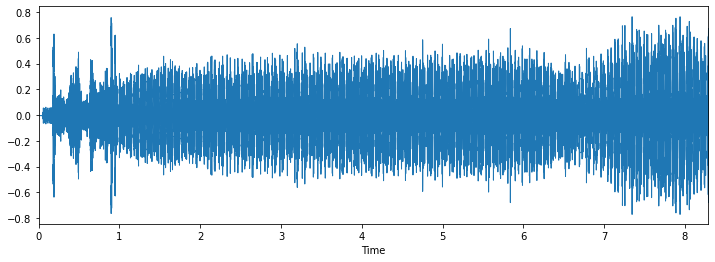

In [16]:

plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)